In [18]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.columns

Index(['name', 'price', 'bedroom', 'livingroom', 'floor', 'totfloor',
       'orientation', 'house_type', 'area', 'build_year', 'building_type',
       'location1', 'location2', 'location3'],
      dtype='object')

In [3]:
for i in range(len(data)):
    if data.loc[i,'orientation'] != '南':
        if re.match('.*南.*',data.loc[i,'orientation']):
            data.loc[i,'orientation'] = '南'
        elif re.match('.*北.*',data.loc[i,'orientation']):
            data.loc[i,'orientation'] = '北'
        else:
            data.loc[i,'orientation'] = '东西'
# pd.get_dummies(data['orientation'])

In [12]:
x_train = data.drop(['name','price','floor','location2','location1'],axis=1)
x_train = pd.get_dummies(x_train)
y_train = data['price'].copy()

In [13]:
x_bias = x_train.min()
x_train -= x_bias
x_max = x_train.max()
x_train /= x_max

y_bias = y_train.min()
y_train -= y_bias
y_max = y_train.max()
y_train /= y_max

In [112]:
model = Sequential()
model.add(Dense(64,input_shape=(17,),activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1))

In [113]:
model.compile(loss='mse', optimizer='adam')
model.fit(x_train,y_train,epochs=16,validation_split=0.2)

Train on 34088 samples, validate on 8523 samples
Epoch 1/16
34088/34088 [==============================] - 6s 163us/step - loss: 0.0226 - val_loss: 9.7642e-04
Epoch 2/16
34088/34088 [==============================] - 4s 115us/step - loss: 0.0021 - val_loss: 6.5505e-04
Epoch 3/16
34088/34088 [==============================] - 4s 111us/step - loss: 0.0011 - val_loss: 5.1455e-04
Epoch 4/16
34088/34088 [==============================] - 4s 104us/step - loss: 7.8161e-04 - val_loss: 4.9447e-04
Epoch 5/16
34088/34088 [==============================] - 4s 112us/step - loss: 6.6554e-04 - val_loss: 4.4194e-04
Epoch 6/16
34088/34088 [==============================] - 4s 117us/step - loss: 5.8771e-04 - val_loss: 3.9446e-04
Epoch 7/16
34088/34088 [==============================] - 4s 129us/step - loss: 5.6719e-04 - val_loss: 4.0526e-04
Epoch 8/16
34088/34088 [==============================] - 4s 126us/step - loss: 5.4690e-04 - val_loss: 4.2039e-04
Epoch 9/16
34088/34088 [===========================

In [16]:
y_max

7965.0

[[ 0.14450787  0.2376147   0.10786573 ...,  0.18774495  0.22426134
   0.35171669]
 [ 0.14450787  0.2376147   0.10786573 ...,  0.18774495  0.22426134
   0.35171669]
 [ 0.14450787  0.2376147   0.10786573 ...,  0.18774495  0.22426134
   0.35171669]
 ..., 
 [ 0.14450787  0.2376147   0.10786573 ...,  0.18774495  0.22426134
   0.35171669]
 [ 0.14450787  0.2376147   0.10786573 ...,  0.18774495  0.22426134
   0.35171669]
 [ 0.14450787  0.2376147   0.10786573 ...,  0.18774495  0.22426134
   0.35171669]]


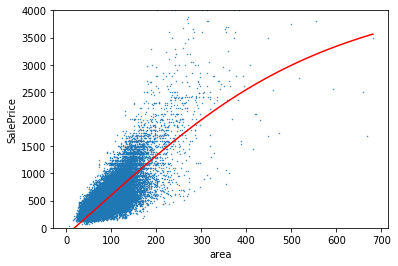

In [125]:
name = 'area'
idx = list(x_train.columns).index(name)
x = x_train.mean().values.reshape(-1,17)
x = x.repeat(100,axis=0).reshape(-1,17)

x[:,idx] = np.linspace(0,1,100)
print(x)
fig = plt.figure()
y=model.predict(x)
plt.plot(np.linspace(0,1,100)*x_max[idx]+x_bias[idx],y*y_max+y_bias,color='red')
plt.scatter(data[name],data['price'],s=0.2)
plt.ylim((0,4000))
plt.ylabel('SalePrice')
plt.xlabel(name)
plt.show()